# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tasya Panggabean
- **Email:** tasyapanggabean661@gmail.com
- **ID Dicoding:** MC009D5X2451

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perubahan musim dapat mempengaruhi penyewaan sepeda?
- Pertanyaan 2 : Apakah perubahan cuaca berpengaruh terhadap jumlah penyewaan sepeda?
- Pertanyaan 3 : Jam berapa yang mencatat jumlah penyewaan sepeda yang paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Tasyaya/Submission-Tasya/refs/heads/main/Data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Tasyaya/Submission-Tasya/refs/heads/main/Data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Kita dapat melihat perbandingan antar musim, menganilisi jumlah penyewaan sepeda oleh pengguna yang terdaftar maupun casual yang berubah setiap musim.
- Jumlah data dalam dataset → Dataset day.csv mencakup 731 data harian, sedangkan hour.csv berisi 17.379 data berdasarkan jam.
- Pengaruh kondisi cuaca → Kita bisa meneliti apakah faktor cuaca, seperti hujan atau kabut, mempengaruhi jumlah penyewa sepeda.
- Korelasi suhu dan angin → Kita dapat mengeksplorasi hubungan antara suhu udara, kelembaban, serta kecepatan angin terhadap volume penyewaan sepeda.
- Perbedaan pola pengguna casual dan terdaftar → Kita dapat mengidentifikasi apakah pengguna casual lebih cenderung menyewa sepeda pada jam atau hari tertentu, serta bagaimana faktor eksternal seperti cuaca atau hari kerja memengaruhi pola mereka,.

### Assessing Data

# Penilaian terhadap tabel day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("\nTampilan Dari Dataset day_df: ")
print(day_df.head())


Tampilan Dari Dataset day_df: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1

In [ ]:
print("\nMelakukan Check Apakah Ada Data Yang Hilang dalam Dataset day_df: ")
print(day_df.isna().sum())


Melakukan Check Apakah Ada Data Yang Hilang dalam Dataset day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# Penilaian terhadap tabel hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("\nTampilan Dari Dataset hour_df: ")
print(hour_df.head())


Tampilan Dari Dataset hour_df: 
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [ ]:
print("\nMelakukan Check Apakah Ada Data Yang Hilang dalam Dataset hour_df: ")
print(hour_df.isna().sum())


Melakukan Check Apakah Ada Data Yang Hilang dalam Dataset hour_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Berdasarkan hasil pemeriksaan data, kedua dataset (hour.csv dan day.csv) tidak memiliki data yang hilang. Namun, kolom dteday (tanggal) masih dalam format string (teks), sehingga perlu dikonversi ke format datetime untuk kemudahan analisis lebih lanjut.
- Seluruh kolom dalam dataset telah memiliki tipe data yang sesuai dengan nilainya, yaitu integer dan float.

### Cleaning Data

# Check data duplication

In [ ]:
print("\nJumlah Data Duplikat Pada Dataset day_df: ", day_df.duplicated().sum())
print("\nJumlah Data Duplikat Pada Dataset hour_df: ", hour_df.duplicated().sum())


Jumlah Data Duplikat Pada Dataset day_df:  0

Jumlah Data Duplikat Pada Dataset hour_df:  0


# Recheck Missing Value

In [ ]:
print("\nMissing Value Pada Dataset day_df:")
print(day_df.isna().sum())
print("\nMissing Value Pada Dataset hour_df:")
print(hour_df.isna().sum())


Missing Value Pada Dataset day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Value Pada Dataset hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**

- Dari kedua dataset tersebut sudah bersih sehingga tidak ada data yang perlu di cleaning.

## Exploratory Data Analysis (EDA)

### Explore ...

# Memuat Dataframe dari dataset day_df dan hour_df

Day_df


In [59]:
#Menampilkan Dataset day_df
print("\nStatistik Dataset day_df: ")
day_df.describe(include="all")


Statistik Dataset day_df: 


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [60]:
# Menanalisis Musim Terhadap Penyewaan Sepeda
season_stats = (day_df.groupby("season")
                .agg(total_count=("cnt", "sum"),
                     average_count=("cnt", "mean"),
                     max_count=("cnt", "max"),
                     min_count=("cnt", "min"),
                     std_count=("cnt", "std"))
                .rename(index={1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}))

season_stats

,total_count,average_count,max_count,min_count,std_count
season,,,,,
Semi,471348,2604.132597,7836,431,1399.942119
Panas,918589,4992.331522,8362,795,1695.977235
Gugur,1061129,5644.303191,8714,1115,1459.800381
Dingin,841613,4728.162921,8555,22,1699.615261


In [61]:
# Group by Season / Musim
day_df.groupby(by="season").season.nunique().sort_values(ascending=False)

,season
season,
1,1
2,1
3,1
4,1


In [62]:
# Group by Weather Situation / kondisi cuaca
day_df.groupby(by="weathersit").weathersit.nunique().sort_values(ascending=False)

,weathersit
weathersit,
1,1
2,1
3,1


In [63]:
# Mengambil 10 Sample dari Dataset day_df secara acak
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
627,628,2012-09-19,3,1,9,0,3,1,1,0.552500,0.540404,0.536667,0.215175,788,6803,7591
273,274,2011-10-01,4,0,10,0,6,0,2,0.410000,0.412863,0.753750,0.292296,480,1949,2429
578,579,2012-08-01,3,1,8,0,3,1,1,0.717500,0.667308,0.677500,0.141179,1074,6506,7580
596,597,2012-08-19,3,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.086450,1208,3341,4549
112,113,2011-04-23,2,0,4,0,6,0,2,0.460000,0.450121,0.887917,0.230725,1462,2574,4036
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
688,689,2012-11-19,4,1,11,0,1,1,2,0.380833,0.375621,0.623333,0.235067,449,5050,5499
660,661,2012-10-22,4,1,10,0,1,1,1,0.487500,0.482942,0.568333,0.081483,830,6228,7058
313,314,2011-11-10,4,0,11,0,4,1,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933
262,263,2011-09-20,3,0,9,0,2,1,2,0.561667,0.532217,0.881250,0.134954,438,3203,3641


Dataset hour_df

In [64]:
#Menampilkan Dataset hour_df
print("\nStatistik Dataset hour_df: ")
hour_df.describe(include="all")


Statistik Dataset hour_df: 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [65]:
# Menganalisis hubungan kondisi cuaca dalam penyewaan sepeda
weather_status = (hour_df.groupby("weathersit")
                .agg(total_count=("cnt", "sum"),
                     average_count=("cnt", "mean"),
                     max_count=("cnt", "max"),
                     min_count=("cnt", "min"),
                     std_count=("cnt", "std"))
                .rename(index={1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Salju"}))

weather_status

,total_count,average_count,max_count,min_count,std_count
weathersit,,,,,
Cerah,2338173,204.869272,977,1,189.487773
Mendung,795952,175.165493,957,1,165.431589
Hujan,158331,111.579281,891,1,133.781045
Salju,223,74.333333,164,23,77.925178


In [66]:
# Group by Weather Situation / kondisi cuaca
hour_df.groupby(by="weathersit").weathersit.nunique().sort_values(ascending=False)

,weathersit
weathersit,
1,1
2,1
3,1
4,1


In [67]:
# Group by Season / Musim
day_df.groupby(by="season").season.nunique().sort_values(ascending=False)

,season
season,
1,1
2,1
3,1
4,1


In [68]:
# Mengambil 10 Sample dari Dataset hour_df secara acak
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2163,2164,2011-04-05,2,0,4,0,0,2,1,1,0.62,0.6212,0.50,0.1045,10,12,22
5986,5987,2011-09-11,3,0,9,23,0,0,0,3,0.58,0.5455,0.78,0.0896,12,33,45
9988,9989,2012-02-26,1,1,2,5,0,0,0,1,0.22,0.2121,0.44,0.2239,0,5,5
6152,6153,2011-09-18,3,0,9,22,0,0,0,2,0.54,0.5152,0.68,0.0896,9,75,84
8750,8751,2012-01-05,1,1,1,10,0,4,1,2,0.24,0.2576,0.52,0.0896,5,81,86
1485,1486,2011-03-07,1,0,3,6,0,1,1,1,0.20,0.1818,0.75,0.3881,3,31,34
16039,16040,2012-11-06,4,1,11,0,0,2,1,1,0.24,0.2576,0.60,0.1045,1,18,19
14908,14909,2012-09-18,3,1,9,9,0,2,1,2,0.66,0.6061,0.83,0.5821,27,266,293
3604,3605,2011-06-04,2,0,6,2,0,6,0,1,0.54,0.5152,0.56,0.1940,18,41,59
15786,15787,2012-10-24,4,1,10,23,0,3,1,2,0.58,0.5455,0.68,0.0896,12,111,123


In [69]:
# Mengelompokkan berbagai data berdasarkan musim dan menghitung rata-rata jumlah penyewaan sepeda
season_usage = day_df.groupby("season").agg(avg_rentals=("cnt", "mean")).reset_index()

# Mengubah angka musim menjadi label nama agar mudah dibaca
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_usage["season"] = season_usage["season"].replace(season_labels)

# Menampilkan hasil
season_usage

,season,avg_rentals
0,Spring,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


In [70]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata penyewaan sepeda
weather_usage = day_df.groupby("weathersit").agg(avg_rentals=("cnt", "mean")).reset_index()

# Mengubah angka kondisi cuaca menjadi label deskriptif agar lebih mudah dibaca
weather_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan"}
weather_usage["weathersit"] = weather_usage["weathersit"].replace(weather_labels)

# Menampilkan hasil akhir
weather_usage

,weathersit,avg_rentals
0,Cerah,4876.786177
1,Mendung,4035.862348
2,Hujan,1803.285714


In [71]:
# Menghitung total penyewaan sepeda berdasar hitungan hari dalam seminggu
weekday_usage = day_df.groupby("weekday").agg(total_rentals=("cnt", "sum")).reset_index()

# Mengubah angka hari menjadi nama agar mudah diingat
weekday_names = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}
weekday_usage["weekday"] = weekday_usage["weekday"].replace(weekday_names)

# Menampilkan hasil
weekday_usage

,weekday,total_rentals
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


In [72]:
# Menghitung total peminjaman sepeda per jam dalam sehari
hourly_usage = (hour_df.groupby("hr")
                .agg(total_rentals=("cnt", "sum"))
                .reset_index()
                .sort_values("hr"))

# Menampilkan hasil akhir
hourly_usage

,hr,total_rentals
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [73]:
# Rekap total penyewaan sepeda menurut musim dan cuaca
season_weather_usage = (
    day_df.groupby(["season", "weathersit"])["cnt"]
    .sum()
    .reset_index()
    .rename(columns={"cnt": "total_rentals"})
    .sort_values(["season", "weathersit"])
)

# Mengonversi kode musim dan cuaca menjadi label
season_weather_usage["season"] = season_weather_usage["season"].replace(season_labels)
season_weather_usage["weathersit"] = season_weather_usage["weathersit"].replace(weather_labels)

# Menampilkan hasil akhir
season_weather_usage

,season,weathersit,total_rentals
0,Spring,Cerah,312036
1,Spring,Mendung,155573
2,Spring,Hujan,3739
3,Summer,Cerah,626986
4,Summer,Mendung,288096
5,Summer,Hujan,3507
6,Fall,Cerah,799443
7,Fall,Mendung,250679
8,Fall,Hujan,11007
9,Winter,Cerah,519487


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan musim dapat mempengaruhi penyewaan sepeda?

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


<ipython-input-56-b92b86515a92>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_agg, x='season', y='cnt', palette='coolwarm')


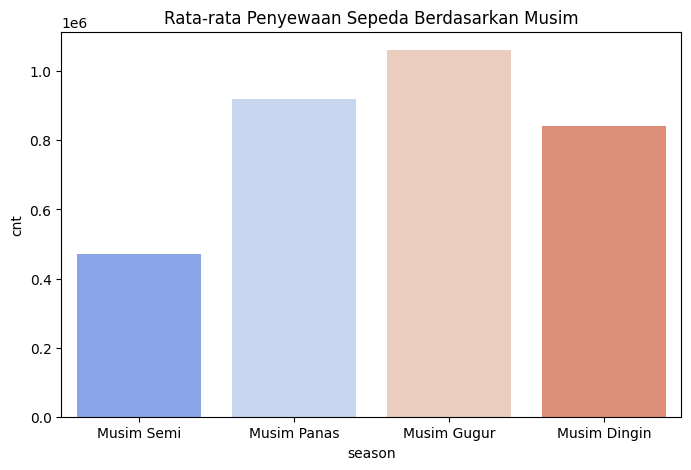

In [ ]:
# Agregasi berdasarkan musim
season_agg = hour_df.groupby('season').agg({
    'cnt': 'sum'
}).reset_index()

# Tampilkan hasil agregasi
print(season_agg)

# Visualisasi rata-rata penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=season_agg, x='season', y='cnt', palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

### Pertanyaan 2: Apakah perubahan cuaca berpengaruh terhadap jumlah penyewaan sepeda?

  weathersit      cnt
0      Cerah  2338173
1    Mendung   795952
2      Hujan   158331
3        NaN      223


<ipython-input-57-596687936d88>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_agg, x='weathersit', y='cnt', palette='coolwarm')


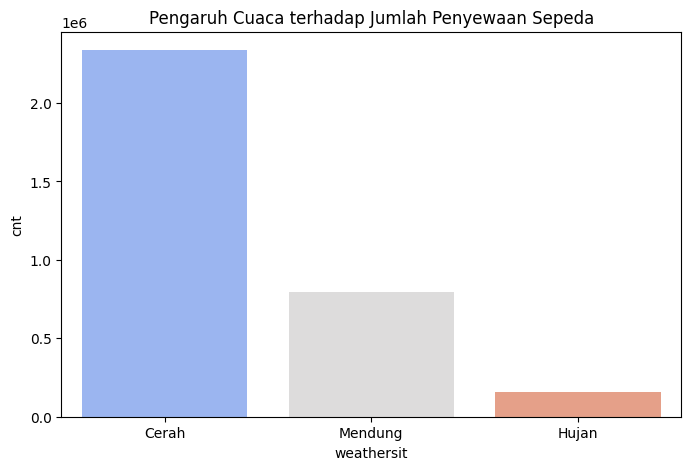

In [ ]:
# Agregasi berdasarkan cuaca
weather_agg = hour_df.groupby('weathersit').agg({
    'cnt': 'sum'
}).reset_index()

# Ubah nilai numerik menjadi label yang lebih informatif
weather_labels = {
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan'
}
weather_agg['weathersit'] = weather_agg['weathersit'].map(weather_labels)

# Tampilkan hasil agregasi
print(weather_agg)

# Visualisasi pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_agg, x='weathersit', y='cnt', palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 3: Jam berapa yang mencatat jumlah penyewaan sepeda yang paling tinggi?

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


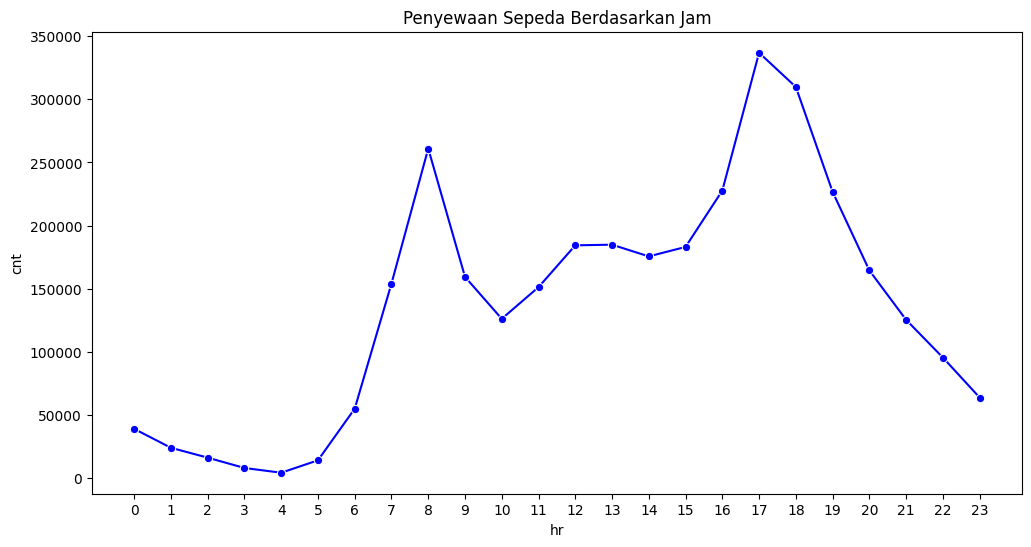

In [ ]:
# Agregasi berdasarkan jam
hour_agg = hour_df.groupby('hr').agg({
    'cnt': 'sum'
}).reset_index()

# Tampilkan hasil agregasi
print(hour_agg)

# Visualisasi waktu penyewaan sepeda terbanyak
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_agg, x='hr', y='cnt', marker='o', color='blue')
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xticks(range(0, 24))
plt.show()

## Conclusion

Pertanyaan 1 : Dampak Musim terhadap Penyewaan Sepeda
Penyewaan sepeda menunjukkan tren tertinggi selama musim gugur dibandingkan dengan musim lainnya. Hal ini mengindikasikan bahwa faktor musiman memiliki peran penting dalam jumlah penyewaan, di mana musim gugur menjadi periode dengan aktivitas penyewaan paling tinggi, sementara musim lainnya mengalami penurunan.

Pertanyaan 2 : Dampak Cuaca terhadap Penyewaan Sepeda
Cuaca yang cerah berkontribusi pada meningkatnya jumlah sepeda yang disewa, sedangkan kondisi hujan, terutama yang deras, berdampak pada penurunan signifikan dalam penyewaan. Ini menegaskan bahwa kondisi cuaca yang lebih bersahabat mendorong lebih banyak orang untuk menggunakan layanan penyewaan sepeda.

Pertanyaan 3 : Pola Waktu dalam Penyewaan Sepeda
Aktivitas penyewaan sepeda mencapai puncaknya pada pukul 18.00, yang kemungkinan besar berkaitan dengan jam pulang kerja atau aktivitas sore. Sebaliknya, jumlah penyewaan paling sedikit terjadi pada pukul 04.00, saat mobilitas masyarakat masih sangat rendah.

Berdasarkan hasil analisis ini, penyedia layanan dapat memanfaatkan musim gugur dengan meningkatkan strategi promosi untuk menarik lebih banyak pengguna. Sementara itu, pada musim dengan permintaan lebih rendah, seperti musim semi dan musim dingin, program diskon atau paket khusus dapat menjadi solusi untuk meningkatkan jumlah penyewaan. Selain itu, karena cuaca yang baik meningkatkan penyewaan dan hujan cenderung menguranginya, penyedia bisa mempertimbangkan penyediaan perlengkapan tambahan seperti jas hujan atau jalur khusus yang lebih aman. Untuk mengoptimalkan layanan, jumlah sepeda yang tersedia dapat ditingkatkan pada pukul 18.00 saat permintaan sedang tinggi, sementara penawaran promo atau tarif khusus bisa diterapkan pada jam sepi seperti pukul 04.00 agar distribusi penyewaan lebih merata sepanjang hari.